In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(t):
  return 1/(1+np.exp(-t))

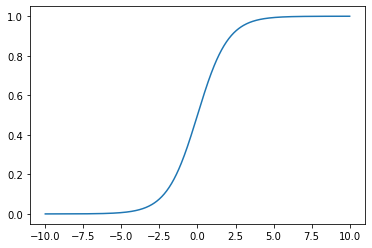

In [5]:
x = np.linspace(-10,10,500)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

In [7]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2+X[:,1] < 1.5, dtype = 'int')

for _ in range(20):
  y[np.random.randint(200)] = 1

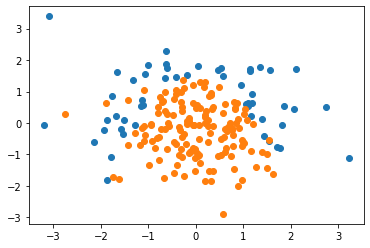

In [8]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [10]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [11]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [12]:
log_reg.score(X_test, y_test)

0.86

In [20]:
def plot_decision_boundary(model, axis):

  x0, x1 = np.meshgrid(
      np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
      np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
  )
  X_new = np.c_[x0.ravel(),x1.ravel()]

  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)

  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


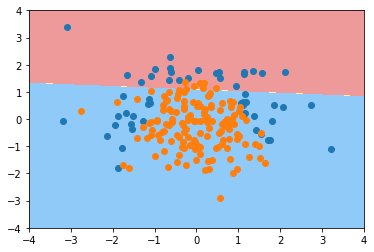

In [21]:
plot_decision_boundary(log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [23]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [24]:
poly_log_reg.score(X_train,y_train)

0.9066666666666666

In [25]:
poly_log_reg.score(X_test,y_test)

0.94

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


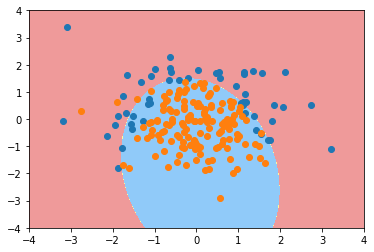

In [27]:
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [28]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [30]:
poly_log_reg.score(X_train,y_train)

0.9066666666666666

In [31]:
poly_log_reg.score(X_test,y_test)

0.94

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


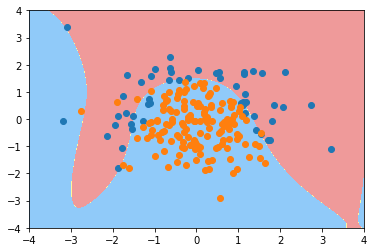

In [29]:
plot_decision_boundary(poly_log_reg2,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [32]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])


In [33]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)
poly_log_reg3.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=0.1))])

In [34]:
poly_log_reg3.score(X_train,y_train)

0.84

In [35]:
poly_log_reg3.score(X_test,y_test)

0.92

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


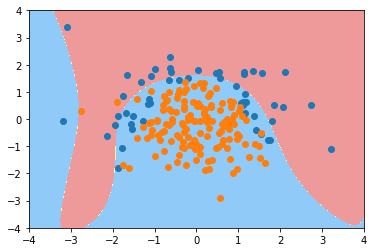

In [37]:
plot_decision_boundary(poly_log_reg3,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [48]:
def PolynomialLogisticRegression(degree, C, penalty='l2', solver='liblinear'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty, solver = solver))
    ])


In [49]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20,C=0.1,penalty='l1')
poly_log_reg4.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

In [52]:
poly_log_reg4.score(X_train, y_train)

0.8266666666666667

In [53]:
poly_log_reg4.score(X_test, y_test)

0.9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


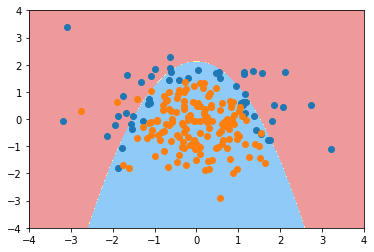

In [54]:
plot_decision_boundary(poly_log_reg4,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()